# Fluctuaciones de las evoluciones del modelo

Impotamos los datos de las simulaciones realizadas

In [23]:
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Define the folder and file path
folder_name = 'data\\Evoluciones'
filename = os.path.join(folder_name, 'Evoluciones_fluctuaciones_1.pkl')

# Load the data from the pickle file
with open(filename, 'rb') as f:
    data = pickle.load(f)

# Access the loaded data
label_data = data['label_data']
total_data = data['total_data']

# Access fixed parameters
fixed_parameters = data['fixed_parameters']
mu = fixed_parameters['mu']
u = fixed_parameters['u']
alpha = fixed_parameters['alpha']
n_0 = fixed_parameters['n_0']
nus = fixed_parameters['nus']
pmu = fixed_parameters['pmu']
Ns = fixed_parameters['Ns']
N_evolutions = fixed_parameters['N_evolutions']

# Example: Print loaded fixed parameters
print("Loaded fixed parameters:")
print(f"mu: {mu}")
print(f"u: {u}")
print(f"alpha: {alpha}")
print(f"n_0: {n_0}")
print(f"nus: {nus}")
print(f"pmu: {pmu}")
print(f"Ns: {Ns}")
print(f"N_evolutions: {N_evolutions}")

Loaded fixed parameters:
mu: 1
u: 0.5
alpha: 0.01
n_0: 1
nus: [0.5, 1, 1.5, 2]
pmu: 0.2
Ns: [5, 10, 20, 30]
N_evolutions: 10000


In [12]:
def find_idx(label, label_data):
    idx = [i for i, x in enumerate(label_data) if x == label]
    return idx[0]

idx_mean = find_idx('Means', label_data)
idx_median = find_idx('Medium', label_data)
idx_std = find_idx('Stds', label_data)
idx_max = find_idx('Maxs', label_data)
idx_len = find_idx('Lenght', label_data)

Evoluciones para $\nu = 0.5$

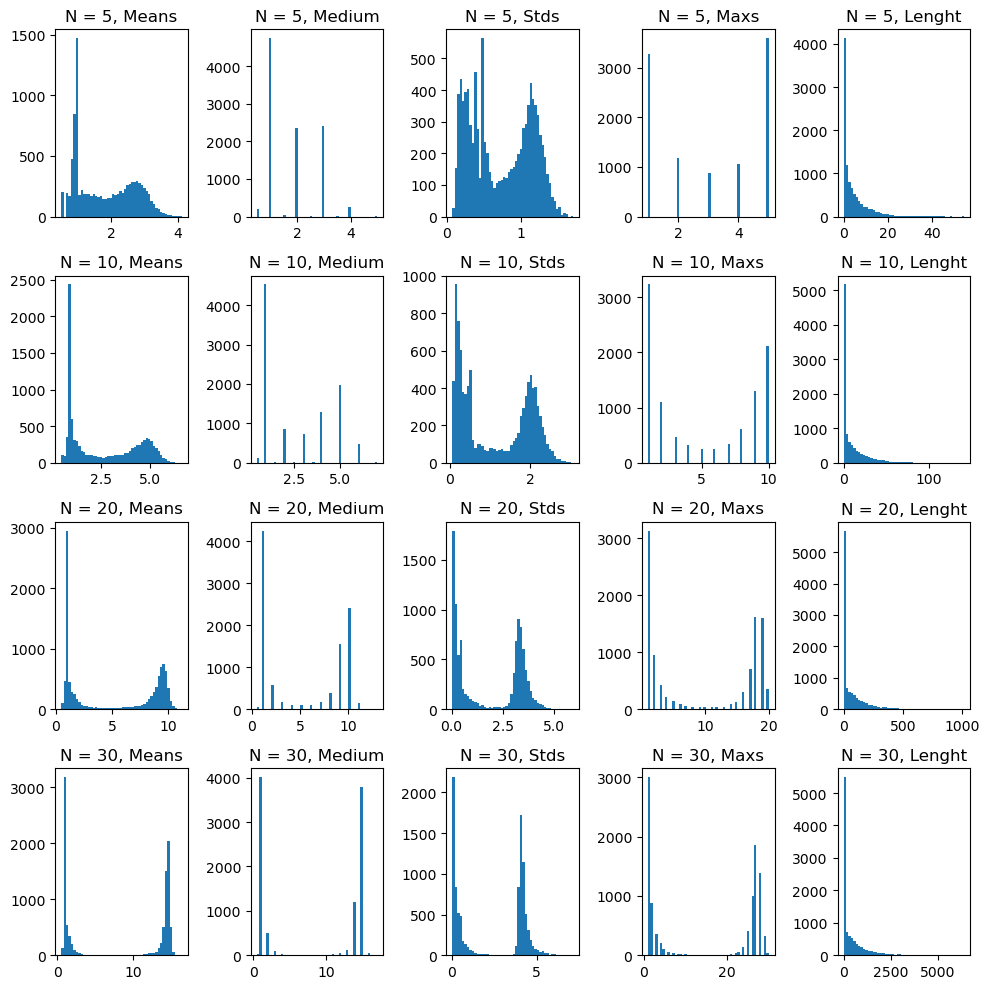

In [41]:
# evolutions for nu = 0.5
nu = 2
idx_nu = find_idx(nu, nus)

# Plot data
plt.figure(figsize=(10, 10))
for i, N_ in enumerate(Ns):
    for j, label_ in enumerate(label_data):
        plt.subplot(len(Ns), len(label_data), i*len(label_data) + label_data.index(label_) + 1)
        plt.hist(total_data[idx_nu][i][j], bins=50, density=False)
        plt.title(f"N = {N_}, {label_}")
plt.tight_layout()
plt.show()

Valores de $\langle n \rangle$ de las evoluciones

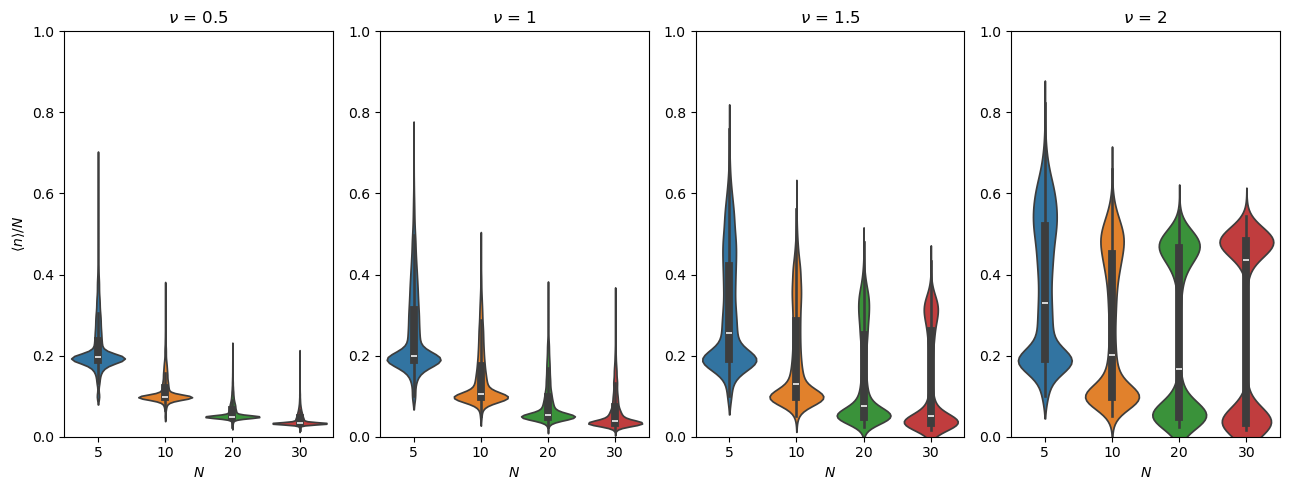

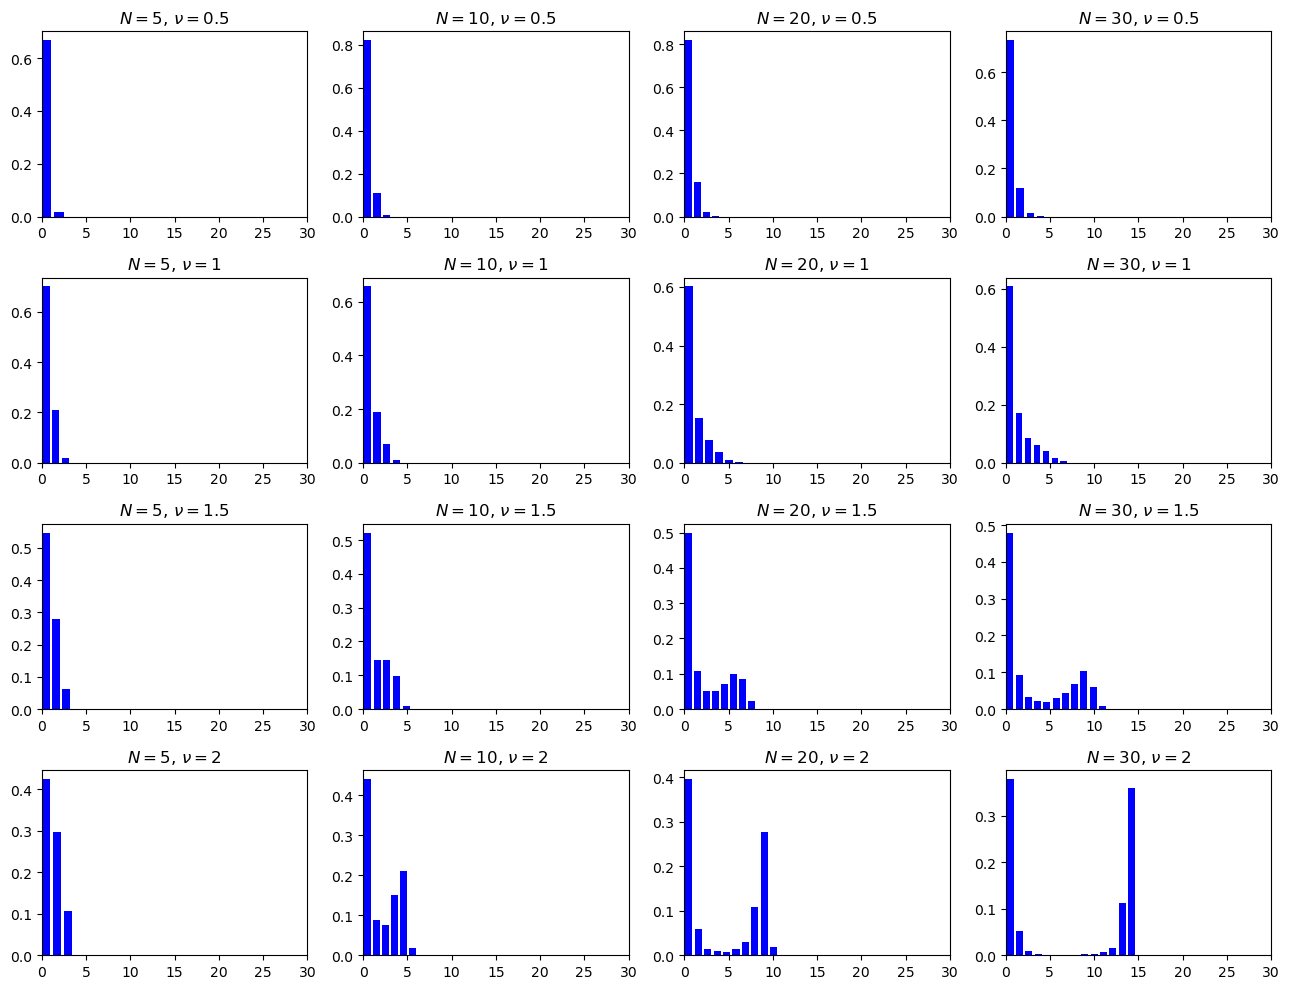

In [85]:
plt.figure(figsize=(13, 5))
for i, nu_ in enumerate(nus):
    idx_nu = find_idx(nu_, nus)
    data = []
    for j, N_ in enumerate(Ns):
        data.append(total_data[idx_nu][j][idx_mean]*(1/N_))
    df = pd.DataFrame(data).T
    df.columns = Ns
    ax = plt.subplot(1, len(nus), nus.index(nu_) + 1)
    sns.violinplot(data=df, inner='box', density_norm = "area")
    plt.title(r"$\nu$ = " + str(nu_))
    plt.xlabel(r'$N$')
    if not i:
        plt.ylabel(r'$\langle n \rangle /N$')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Histogramas de los valores máximos, verticales 
plt.figure(figsize=(13, 10))
for i, nu_ in enumerate(nus):
    for j, N_ in enumerate(Ns):
        data = total_data[i][j][idx_mean]
        plt.subplot(len(Ns), len(nus), i*len(nus) + j + 1)        
        plt.hist(data, density = True, bins = int(max(data) - min(data)) , align = "left", rwidth = 0.75, color='blue', )
        plt.title(r"$N = $" + str(N_) +  r", $\nu = $" + str(nu_))
        plt.xlim([0, max(Ns)])
plt.tight_layout()
plt.show()

Valores de la longitud de las evoluciones, $T_{ext} / \mu $

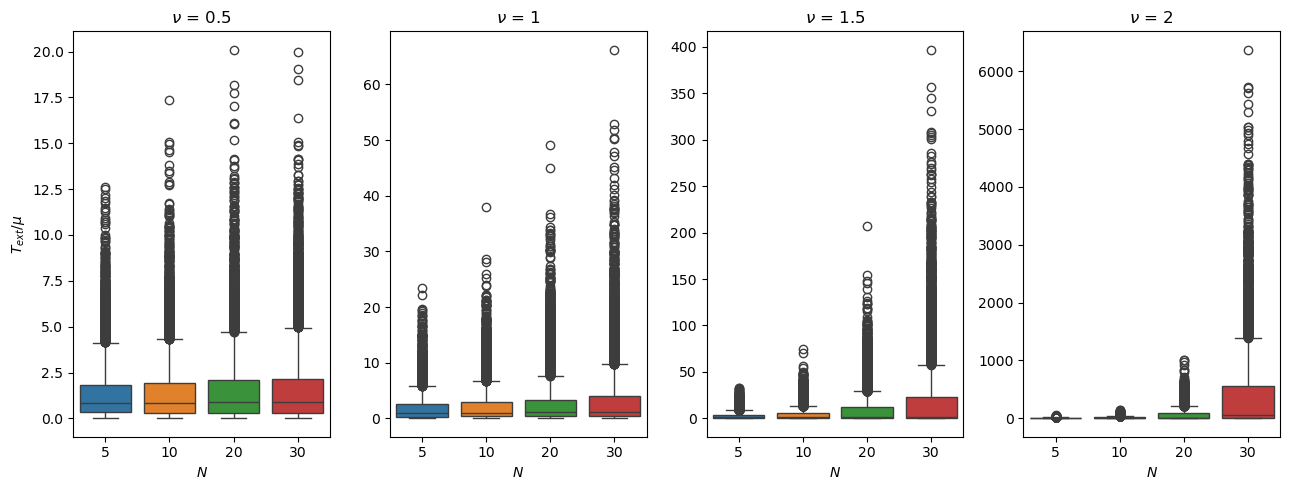

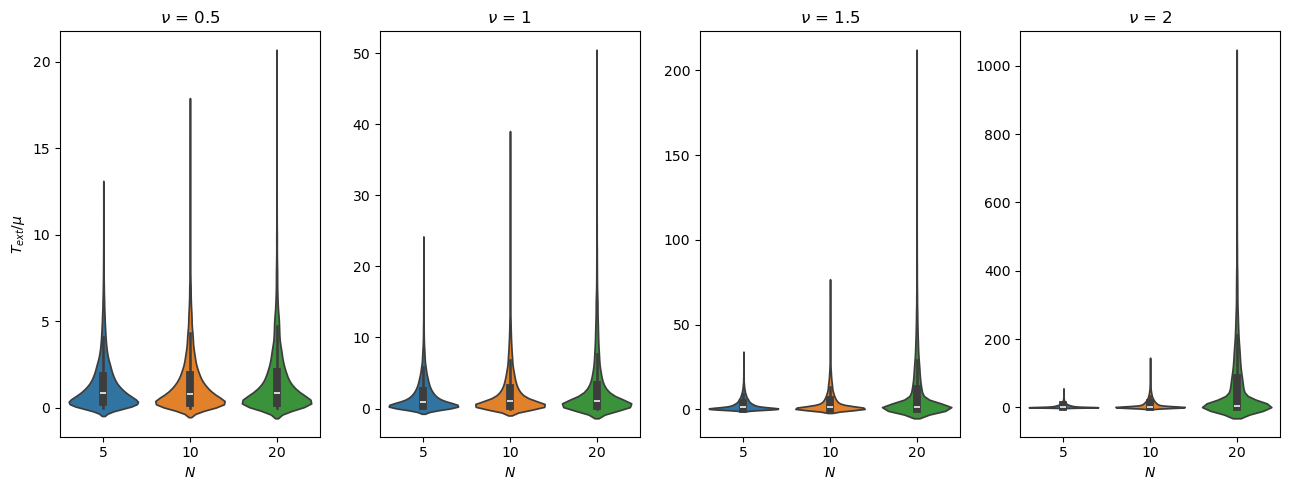

In [58]:
plt.figure(figsize=(13, 5))
for i, nu_ in enumerate(nus):
    idx_nu = find_idx(nu_, nus)
    data = []
    for j, N_ in enumerate(Ns):
        data.append(total_data[idx_nu][j][idx_len])
    df = pd.DataFrame(data).T
    df.columns = Ns
    ax = plt.subplot(1, len(nus), nus.index(nu_) + 1)
    sns.boxplot(data=df)
    plt.title(r"$\nu$ = " + str(nu_))
    plt.xlabel(r'$N$')
    if not i:
        plt.ylabel(r'$T_{ext}/\mu$')

plt.tight_layout()
plt.show()

plt.figure(figsize=(13, 5))
for i, nu_ in enumerate(nus):
    idx_nu = find_idx(nu_, nus)
    data = []
    for j, N_ in enumerate(Ns[:-1]):
        data.append(total_data[idx_nu][j][idx_len])
    df = pd.DataFrame(data).T
    df.columns = Ns[:-1]
    ax = plt.subplot(1, len(nus), nus.index(nu_) + 1)
    sns.violinplot(data=df, density_norm= "area")
    plt.title(r"$\nu$ = " + str(nu_))
    plt.xlabel(r'$N$')
    if not i:
        plt.ylabel(r'$T_{ext}/\mu$')

plt.tight_layout()
plt.show()

Valor máximo $n_{max}/N$

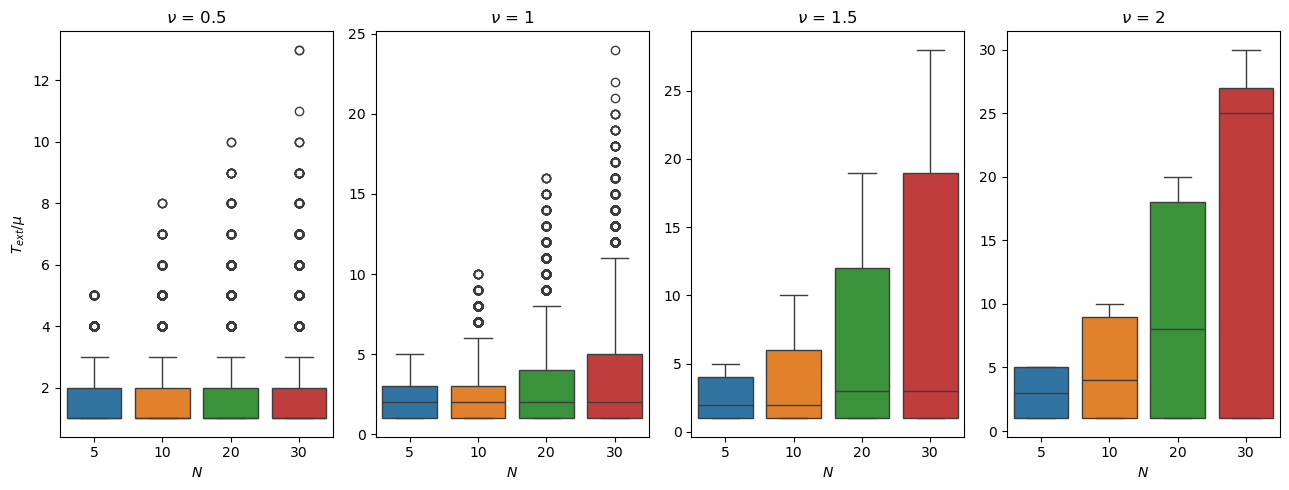

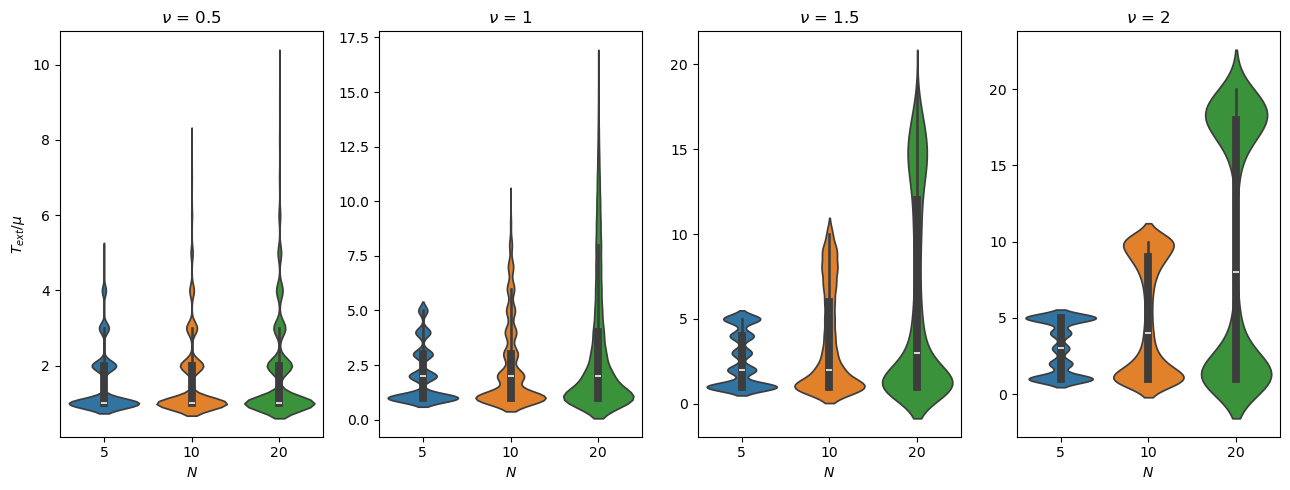

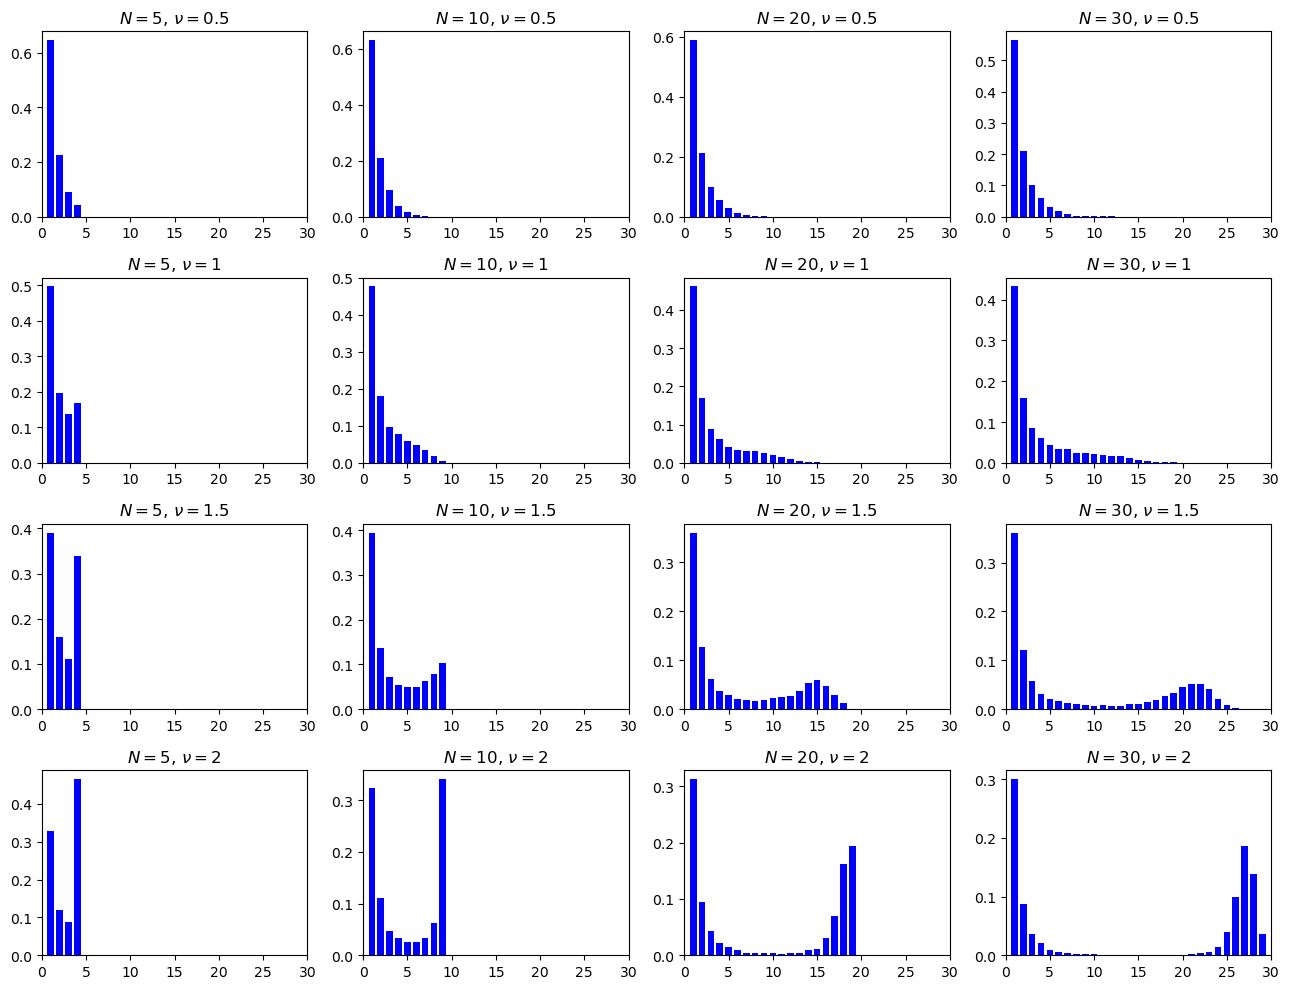

In [84]:
plt.figure(figsize=(13, 5))
for i, nu_ in enumerate(nus):
    idx_nu = find_idx(nu_, nus)
    data = []
    for j, N_ in enumerate(Ns):
        data.append(total_data[idx_nu][j][idx_max])
    df = pd.DataFrame(data).T
    df.columns = Ns
    ax = plt.subplot(1, len(nus), nus.index(nu_) + 1)
    sns.boxplot(data=df)
    plt.title(r"$\nu$ = " + str(nu_))
    plt.xlabel(r'$N$')
    if not i:
        plt.ylabel(r'$T_{ext}/\mu$')

plt.tight_layout()
plt.show()

plt.figure(figsize=(13, 5))
for i, nu_ in enumerate(nus):
    idx_nu = find_idx(nu_, nus)
    data = []
    for j, N_ in enumerate(Ns[:-1]):
        data.append(total_data[idx_nu][j][idx_max])
    df = pd.DataFrame(data).T
    df.columns = Ns[:-1]
    ax = plt.subplot(1, len(nus), nus.index(nu_) + 1)
    sns.violinplot(data=df, density_norm= "area")
    plt.title(r"$\nu$ = " + str(nu_))
    plt.xlabel(r'$N$')
    if not i:
        plt.ylabel(r'$T_{ext}/\mu$')

plt.tight_layout()
plt.show()

# Histogramas de los valores máximos, verticales 
plt.figure(figsize=(13, 10))
for i, nu_ in enumerate(nus):
    for j, N_ in enumerate(Ns):
        data = total_data[i][j][idx_max]
        plt.subplot(len(Ns), len(nus), i*len(nus) + j + 1)        
        plt.hist(data, density = True, bins = int(max(data) - min(data)) , align = "left", rwidth = 0.75, color='blue')
        plt.title(r"$N = $" + str(N_) +  r", $\nu = $" + str(nu_))
        plt.xlim([0, max(Ns)])
plt.tight_layout()
plt.show()